In [23]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
from scipy.stats import binom

In [24]:
# Generating Life Expectancy
r = np.random.choice(np.arange(30,100), 100)
r2 = np.append(binom.rvs(120, 0.7, size = 50), r)
life_expectancies = np.append(r2, [105, 78, 50, 60, 65, 73, 55, 70, 68, 64, 67, 69, 62, 81, 107, 5, 14])
generated_data = pd.DataFrame({'life expectancy': life_expectancies})
generated_data.head()

# Generating Random Cities
cities = ['Tokyo', 'Porto', 'New York', 'Paris', 'Bern']
rand_cities = np.random.choice(cities, 167)
generated_data['city'] = rand_cities
generated_data.head()

# Attaching a smoking status to each person
smokes = ['smoking', 'not smoking', 'social smoker']
rand_s = np.random.choice(smokes, 167, p = [0.5, 0.3, 0.2])
generated_data['smoking status'] = rand_s
generated_data.head()

# Adding income to each person
income = np.random.exponential(20, size = 167) * 1000
generated_data['income'] = np.round(income)

generated_data.head()

,life expectancy,city,smoking status,income
0,89,New York,not smoking,24315.0
1,84,Bern,social smoker,14252.0
2,89,Paris,smoking,47346.0
3,81,Bern,not smoking,6094.0
4,89,Tokyo,social smoker,29640.0


# Question 2A: Distribution of Population for Different Cities

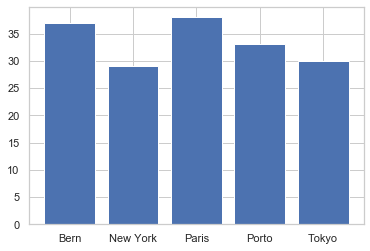

In [25]:
cities = generated_data.groupby('city', as_index=False).count()
plt.bar(cities['city'], cities['life expectancy']);

# Question 2B: Distribution of Income

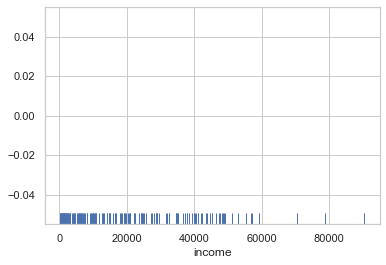

In [26]:
# Rug plot
sns.distplot(generated_data['income'], kde=False, rug=True, hist=False);

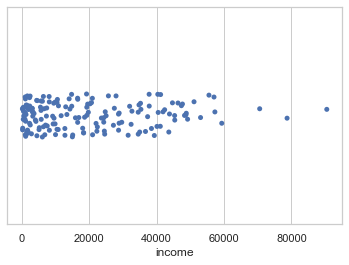

In [27]:
# Stripplot
ax = sns.stripplot(x=generated_data['income'])

# Question 2C: Income vs Life Expectancy

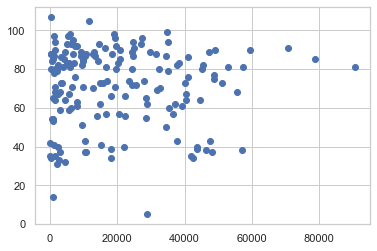

In [28]:
plt.scatter(x=generated_data['income'], y=generated_data['life expectancy']);

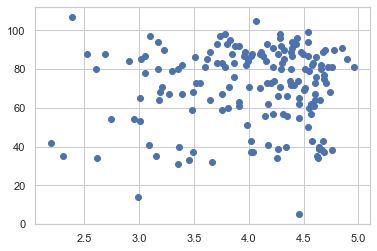

In [29]:
# Same plot but with logged income
plt.scatter(x=np.log10(generated_data['income']), y=generated_data['life expectancy']);

# Question 2D: Income for Different Cities

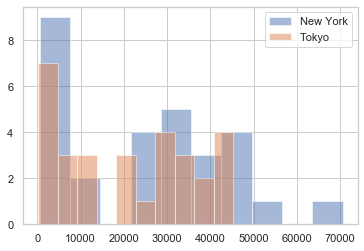

In [30]:
# Overlaid Histograms
plt.hist(x=generated_data[generated_data['city']=='New York']['income'], alpha=0.5, label='New York')
plt.hist(x=generated_data[generated_data['city']=='Tokyo']['income'], alpha=0.5, label='Tokyo')
plt.legend();

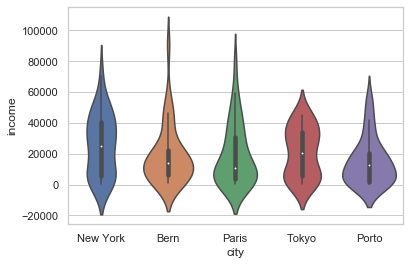

In [31]:
# Side by Side Violin Plots
sns.violinplot(x='city', y='income', data=generated_data);

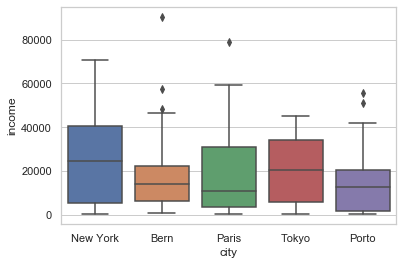

In [32]:
# Side by Side Box Plots

sns.boxplot(x='city', y='income', data=generated_data);

# Question 2E: Income, Life Expectancy, Smoking Status, City

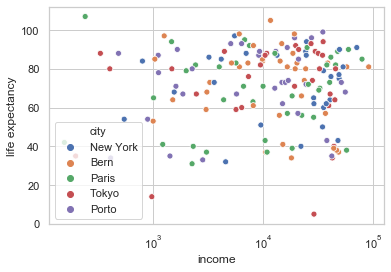

In [33]:
# Plotting income vs life expectancy and distinguishing city by color

f = sns.scatterplot(x='income', y='life expectancy', hue='city', data=generated_data)
f.set(xscale="log");

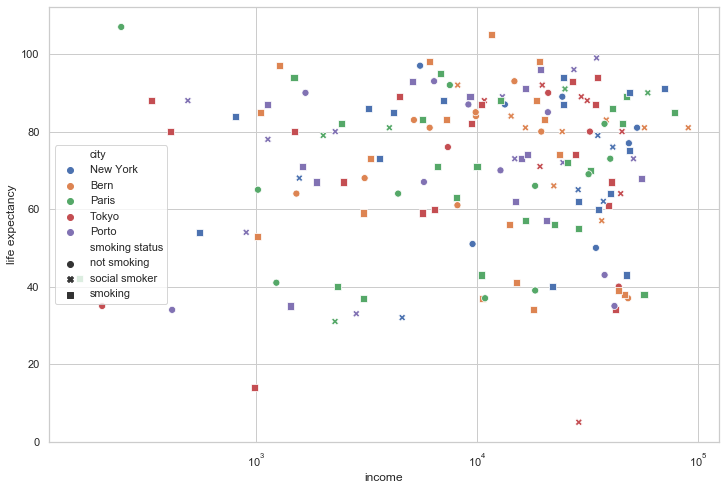

In [34]:
# Plotting income vs life expectancy, distinguishing city by color and smoking status by symbol

plt.figure(figsize=(12, 8))
f = sns.scatterplot(x='income', y='life expectancy', hue='city', 
                    style='smoking status', data=generated_data, s=50)
f.set(xscale="log");

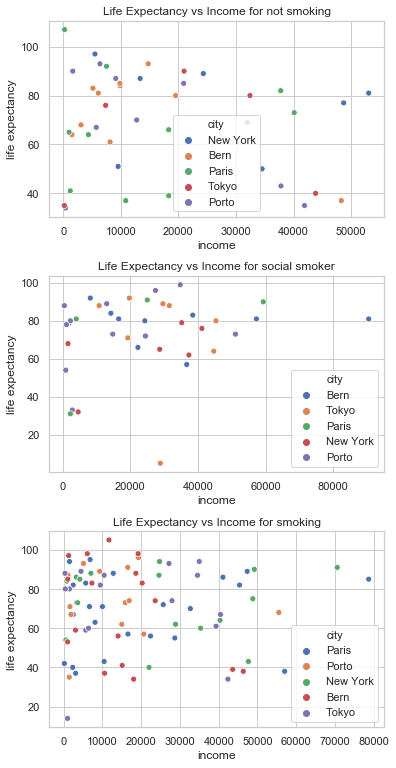

In [35]:
# Plotting income vs life expectancy, distinguishing city by color and gridding on smoking status

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6, 13))
smoking_statuses = generated_data['smoking status'].unique()
ix = 0
for status in smoking_statuses:
    sns.scatterplot(x='income', y='life expectancy', hue='city', 
                    data=generated_data[generated_data['smoking status'] == status], ax=ax[ix])
    ax[ix].set_title(f'Life Expectancy vs Income for {status}')
    ix += 1
fig.subplots_adjust(hspace=0.3)